In [104]:
import pandas as pd
import numpy as np

In [105]:
data=pd.read_csv('E:/Ramya/brushUps/Basics/ML using sklearn/Projects/Wine_quality/data/winequality-red.csv',delimiter=';')

In [106]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [108]:
data.max(axis=0)

fixed acidity            15.90000
volatile acidity          1.58000
citric acid               1.00000
residual sugar           15.50000
chlorides                 0.61100
free sulfur dioxide      72.00000
total sulfur dioxide    289.00000
density                   1.00369
pH                        4.01000
sulphates                 2.00000
alcohol                  14.90000
quality                   8.00000
dtype: float64

In [109]:
data.min(axis=0)

fixed acidity           4.60000
volatile acidity        0.12000
citric acid             0.00000
residual sugar          0.90000
chlorides               0.01200
free sulfur dioxide     1.00000
total sulfur dioxide    6.00000
density                 0.99007
pH                      2.74000
sulphates               0.33000
alcohol                 8.40000
quality                 3.00000
dtype: float64

In [110]:
X=data.iloc[:,0:11]
y=data.iloc[:,11]

In [111]:
from sklearn import preprocessing
col_names=X.columns
scaler=preprocessing.MinMaxScaler()
normalized_list=scaler.fit_transform(X)
X_data=pd.DataFrame(normalized_list,columns=col_names)
X_data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [112]:
y.describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [113]:
y_dict=dict(y.value_counts())

In [114]:
y_quality=[*y_dict]
y_counts=list(y_dict.values())

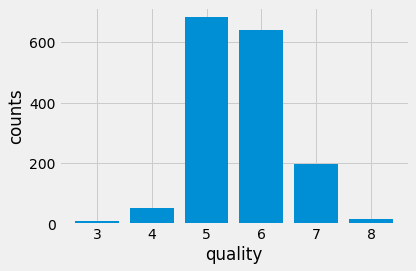

In [115]:
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
plt.bar(y_quality,y_counts)
plt.xlabel('quality')
plt.ylabel('counts')
plt.tight_layout()
plt.show()

In [116]:
y=pd.cut(y,bins=3,labels=['poor','normal','excellent'])

In [117]:
y.value_counts()

normal       1319
excellent     217
poor           63
Name: quality, dtype: int64

In [118]:
from sklearn.preprocessing import LabelEncoder
label_map={'poor':0,'normal':1,'excellent':2}

In [119]:
y=y.map(label_map)
y=np.array(y)

In [120]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_data,y,test_size=0.2,random_state=42)

In [121]:
from sklearn import neighbors
from sklearn.metrics import f1_score,confusion_matrix,make_scorer
from math import floor,sqrt

In [122]:
#KNN training and checking f1_score
sq=floor(sqrt(len(X_train)))
k=sq if (sq%2)!=0 else sq+1


In [123]:
def knnmethod(k):
    knn=neighbors.KNeighborsClassifier(n_neighbors=k,weights='uniform')
    knn.fit(X_train,y_train)   
    y_pred_knn=knn.predict(X_test) 
    score=f1_score(y_test,y_pred_knn,average='weighted')
    cm=pd.DataFrame(confusion_matrix(y_test,y_pred_knn),columns=['predicted_poor','predicted_normal','predicted_excellent'],index=['true_poor','true_normal','true_excellent'])
    return score,cm

In [124]:
score,cm=knnmethod(k)

In [125]:
score

0.7735992494824017

In [126]:
cm

,predicted_poor,predicted_normal,predicted_excellent
true_poor,0,11,0
true_normal,0,250,12
true_excellent,0,37,10


In [127]:
f1=make_scorer(f1_score,average='weighted')

In [128]:
#cross validating to find best estimator using grid search cv
from sklearn.model_selection import GridSearchCV, cross_val_score

In [129]:
knn_cross_val_neighbors=list(range(k-10,k+30,2))
knn_cross_val_clf=GridSearchCV(neighbors.KNeighborsClassifier(weights='uniform'),{'n_neighbors':knn_cross_val_neighbors},cv=10,return_train_score=False,scoring=f1)
knn_cross_val_clf.fit(X_data,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [25, 27, 29, 31, 33, 35, 37, 39, 41, 43,
                                         45, 47, 49, 51, 53, 55, 57, 59, 61,
                                         63]},
             scoring=make_scorer(f1_score, average=weighted))

In [130]:
df_knn=pd.DataFrame(knn_cross_val_clf.cv_results_)

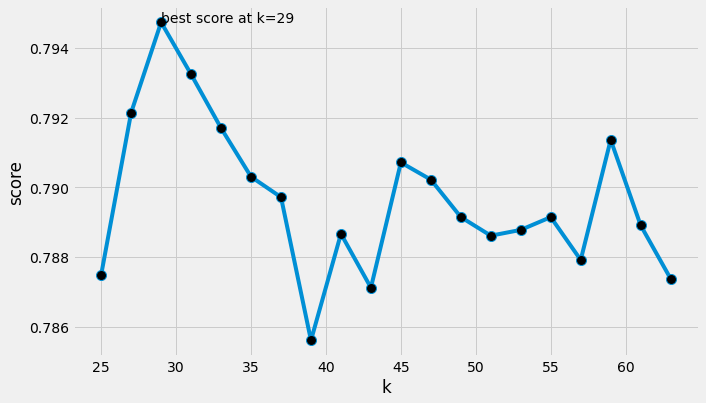

In [131]:
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(df_knn['param_n_neighbors'],df_knn['mean_test_score'],marker='o',markerfacecolor='black',markersize=10)
plt.xlabel('k')
plt.ylabel('score')
bpoint=knn_cross_val_clf.best_params_['n_neighbors']
bscore=knn_cross_val_clf.best_score_
ax.annotate('best score at k='+str(bpoint),xy=(bpoint,bscore))
plt.savefig('best_k_knn')
plt.show()


In [132]:
score,cm=knnmethod(bpoint)


In [133]:
score

0.7780959526212354

In [134]:
cm

,predicted_poor,predicted_normal,predicted_excellent
true_poor,0,11,0
true_normal,0,252,10
true_excellent,0,37,10
